# 2.2. 웹크롤링 맛보기

### 2.2.1 selenium과 크롬드라이버 설치

In [61]:
# 예제 2-34 selenium 라이브러리 불러오기
from selenium import webdriver

※ import 에러 날 경우 라이브러리 설치:   `!pip install selenium`

In [64]:
# 예제 2-35 selenium 설치하기 (미설치 된 경우에 진행)
# !pip install selenium

### 2.2.2 크롬드라이버 활용하기

In [4]:
# 예제 2-36 크롬브라우저 실행하기
from selenium import webdriver
# driver = webdriver.Chrome('c:/playwithdata/chromedriver.exe')

# 이제 이렇게 쓰면 됨
driver = webdriver.Chrome()

### 2.2.3 웹 페이지 접속


In [13]:
# 이제 이렇게 쓰면 됨
driver = webdriver.Chrome()

# 예제 2-37 URL 접속하기
url = 'https://www.naver.com/'
driver.get(url)


### 2.2.4 웹 페이지(HTML) 다운로드

<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" src="https://ntm.pstatic.net/scripts/ntm_27291e35193e.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="
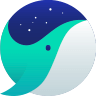
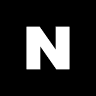

In [14]:
# 예제 2-38 웹페이지 html 다운로드 하기
html = driver.page_source
print(html)

### 2.2.5 HTML 구조 살펴보기


In [23]:
# 예제 2-39 HTML 구조
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>

# 파이썬 코드 셀에서는 HTML 코드를 실행할 수 없습니다.

SyntaxError: invalid syntax (1662154144.py, line 2)

### 2.2.7 BeautifulSoup을 이용한 정보 찾기


In [27]:
# 예제 2-40 실습용 HTML
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''


In [28]:
# 예제 2-41 HTML 문자열 BeautifulSoup 으로 해석하기
from bs4 import BeautifulSoup

# BeautifulSoup 정적 웹페이지 크롤링 할때 주로 사용
soup = BeautifulSoup(html, 'html.parser')


### 2.2.8 HTML 정보 찾기 ① - 태그 속성 활용


In [29]:
# 예제 2-42 태그명으로 태그 찾기
tags_span = soup.select('span')
tags_p = soup.select('p')

In [30]:
# 예제 2-43 id와 class로 태그 찾기
ids_fruits1 = soup.select('#fruits1')
class_price = soup.select('.price')
tags_span_class_price = soup.select('span.price')

### 2.2.9 HTML 정보 찾기 ② - 상위 구조 활용

In [31]:
# 예제 2-44 태그 구조로 위치 찾기①
tags_name = soup.select('span.name')
print(tags_name)

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


In [32]:
# 예제 2-45 태그 구조로 위치 찾기②
tags_banana1 = soup.select('#fruits1 > span.name')
print(tags_banana1)

[<span class="name"> 바나나 </span>]


In [33]:
# 예제 2-46 태그 구조로 위치 찾기③
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
tags_banana3 = soup.select('div.sale span.name')
print(tags_banana2)
print(tags_banana3)

[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


### 2.2.10 정보 가져오기 ① - 태그 그룹에서 하나의 태그 선택하기


In [34]:
# 예제 2-47 태그 그룹에서 하나의 태그만 선택하기
tags = soup.select('span.name')
tag_1 = tags[0]    #인덱스 번호로 하나의 태그 지정하기
print(tag_1)

<span class="name"> 바나나 </span>


In [37]:
# 예제 2-48 태그 그룹에서 반복문으로 태그 하나씩 선택하기
tags = soup.select('span.name')
for tag in tags:      # 반복문으로 태그 그룹에서 각각의 태그 선택하여 활용하기
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


### 2.2.11 정보 가져오기 ② - 선택한 태그에서 정보 가져오기

In [39]:
# 예제 2-49 태그에서 정보 가져오기
content = tag.text   # 태그에서 화면에 보이는 텍스트 부분만 가져오기
attribute = tag['속성명']  # 태그 내 속성값 가져오기


In [40]:
# 예제 2-50 선택한 태그에서 텍스트, 속성 값 가져오기
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)
link = tag['href']
print(link)


 홈페이지 
http://bit.ly/forPlaywithData


### 2.2.12 멜론 노래 순위 정보 크롤링①

※ 경로지정시  `슬러시 (/) 사용` 
    * 역슬러시(\) X  : unicode 에러 발생 가능
    * 슬러시(/)  O

※ 멜론 사이트 개편으로 인해, 크롤링 진행 코드가 변경되었습니다. (updated 2020.07.13)

In [42]:
# 예제 2-51 크롬드라이버 실행
from selenium import webdriver
driver = webdriver.Chrome()

In [43]:
# 예제 2-52 멜론 인기차트 웹페이지 접속하기
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

In [44]:
# 예제 2-53 HTML 다운로드 및 BeautifulSoup으로 읽기
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [45]:
# 예제 2-54-1  100개의 노래 태그 찾기  --> 사이트 개편으로 코드 변경됨(updated 2020.07.13)
songs = soup.select('tr')  
print(len(songs))
print(songs[0])

101
<tr>
<th scope="col">
<div class="wrap t_right"><input class="input_check d_checkall" title="곡 목록 전체 선택" type="checkbox"/></div>
</th>
<th scope="col">
<div class="wrap t_center"><span class="rank">순위</span></div>
</th>
<th scope="col">
<div class="wrap none">순위등락</div>
</th>
<th scope="col">
<div class="wrap none">앨범이미지</div>
</th>
<th scope="col">
<div class="wrap none">곡 상세가기</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">곡정보</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">앨범</div>
</th>
<th scope="col">
<div class="wrap pd_l_30">좋아요</div>
</th>
<th scope="col">
<div class="wrap t_center">듣기</div>
</th>
<th scope="col">
<div class="wrap t_center">담기</div>
</th>
<th scope="col">
<div class="wrap t_center">다운</div>
</th>
<th scope="col">
<div class="wrap t_center">뮤비</div>
</th>
</tr>


In [46]:
# 예제 2-54-2  추가내용(updated 2020.07.13)
# 100개의 곡을 찾고 싶으나, 101개의 태그 뭉치가 검색됨    len(songs)  -->  101 
# 101개 중 첫 번째 태그 뭉치(songs[0]) 을 살펴보니 표에서 컬럼제목(곡정보/앨범/좋아요... )을 나타내고 있음
# 101개 중 첫 번째는 컬럼 제목,   두 번째 부터 끝까지,  남은 100개는 노래 정보 일 것으로 예상됨

songs = soup.select('tr')[1:]     # 첫 번째는 제외하고, 두 번째(인덱스번호 1) 부터 끝까지만 선택
print(len(songs))                 # 100  으로   정리하고 싶은 노래 개수에 맞게 선택됨
print(songs[0])                   # 그 중 첫 번째 태그를 보니, 1위 곡으로 조회됨

100
<tr class="lst50" data-song-no="37194943" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="밤양갱 곡 선택" type="checkbox" value="37194943"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11415997');" title="밤양갱">
<img alt="밤양갱 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/114/15/997/11415997_20240226162412_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail

In [47]:
# 예제 2-55 한 개의 곡 정보 지정하기
song = songs[0]

In [48]:
# 예제 2-56 곡 제목 찾기 1
title = song.select('a')
len(title)

6

In [49]:
# 예제 2-57 곡 제목 찾기 2
title = song.select('span > a')
len(title)

2

In [50]:
# 예제 2-58 곡 제목 찾기 3
title = song.select('div.ellipsis.rank01 > span > a')
len(title)

1

In [51]:
# 예제 2-59 곡 제목 가져오기
title = song.select('div.ellipsis.rank01 > span > a')[0].text
title

'밤양갱'

In [52]:
# 예제 2-60 가수 찾기
singer = song.select('div.ellipsis.rank02 > a')
len(singer)

1

In [53]:
# 예제 2-61 가수 정보 가져오기
singer = song.select('div.ellipsis.rank02 > a')[0].text
singer

'비비 (BIBI)'

In [54]:
# 예제 2-62 멜론 50위 노래순위 정보 가져오기
for song in songs:                                        
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select ('div.ellipsis.rank02 > a')[0].text  
    print(title, singer, sep = ' | ')

밤양갱 | 비비 (BIBI)
Love wins all | 아이유
첫 만남은 계획대로 되지 않아 | TWS (투어스)
EASY | LE SSERAFIM (르세라핌)
To. X | 태연 (TAEYEON)
홀씨 | 아이유
비의 랩소디 | 임재현
Love 119 | RIIZE
Perfect Night | LE SSERAFIM (르세라핌)
에피소드 | 이무진
Shopper | 아이유
그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection)) | 너드커넥션 (Nerd Connection)
사랑은 늘 도망가 | 임영웅
Drama | aespa
헤어지자 말해요 | 박재정
Super Lady | (여자)아이들
인사 | 범진
Wife | (여자)아이들
모래 알갱이 | 임영웅
꿈 | 태연 (TAEYEON)
Seven (feat. Latto) - Clean Ver. | 정국
WAY 4 LUV | PLAVE
나는 아픈 건 딱 질색이니까 | (여자)아이들
우리들의 블루스 | 임영웅
Do or Die | 임영웅
I AM | IVE (아이브)
MANIAC | VIVIZ (비비지)
다시 만날 수 있을까 | 임영웅
Watch Me Woo! | PLAVE
이제 나만 믿어요 | 임영웅
무지개 | 임영웅
버추얼 아이돌 | PLAVE
Get A Guitar | RIIZE
From | PLAVE
우리 영화 | PLAVE
London Boy | 임영웅
아버지 | 임영웅
Polaroid | 임영웅
Love Lee | AKMU (악뮤)
인생찬가 | 임영웅
너의 모든 순간 | 성시경
Baddie | IVE (아이브)
A bientot | 임영웅
관객이 될게 (I stan U) | 아이유
예뻤어 | DAY6 (데이식스)
천상연 | 이창섭
사막에서 꽃을 피우듯 | 우디 (Woody)
You & Me | 제니 (JENNIE)
잘 지내자, 우리 (여름날 우리 X 로이킴) | 로이킴
Merry PLLIstmas | PLAVE
연애편지 | 임영웅
퀸카 (Queencard) | (여자)아이들
Super

In [56]:
# 예제 2-63 멜론 인기차트 중 상위 50곡 크롤링(정리)  # 멜론 사이트 개편으로 코드 수정(updated 2020.07.13)
driver = webdriver.Chrome()     
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)          
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
                               
songs = soup.select('tr')[1:]     # 멜론 사이트 개편으로 코드 수정(updated 2020.07.13)
for song in songs:                                        
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select ('div.ellipsis.rank02 > a')[0].text  
    print(title, singer, sep = ' | ')

밤양갱 | 비비 (BIBI)
Love wins all | 아이유
첫 만남은 계획대로 되지 않아 | TWS (투어스)
EASY | LE SSERAFIM (르세라핌)
To. X | 태연 (TAEYEON)
홀씨 | 아이유
비의 랩소디 | 임재현
Love 119 | RIIZE
Perfect Night | LE SSERAFIM (르세라핌)
에피소드 | 이무진
Shopper | 아이유
그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection)) | 너드커넥션 (Nerd Connection)
사랑은 늘 도망가 | 임영웅
Drama | aespa
헤어지자 말해요 | 박재정
Super Lady | (여자)아이들
인사 | 범진
Wife | (여자)아이들
모래 알갱이 | 임영웅
꿈 | 태연 (TAEYEON)
Seven (feat. Latto) - Clean Ver. | 정국
WAY 4 LUV | PLAVE
나는 아픈 건 딱 질색이니까 | (여자)아이들
우리들의 블루스 | 임영웅
Do or Die | 임영웅
I AM | IVE (아이브)
MANIAC | VIVIZ (비비지)
다시 만날 수 있을까 | 임영웅
Watch Me Woo! | PLAVE
이제 나만 믿어요 | 임영웅
무지개 | 임영웅
버추얼 아이돌 | PLAVE
Get A Guitar | RIIZE
From | PLAVE
우리 영화 | PLAVE
London Boy | 임영웅
아버지 | 임영웅
Polaroid | 임영웅
Love Lee | AKMU (악뮤)
인생찬가 | 임영웅
너의 모든 순간 | 성시경
Baddie | IVE (아이브)
A bientot | 임영웅
관객이 될게 (I stan U) | 아이유
예뻤어 | DAY6 (데이식스)
천상연 | 이창섭
사막에서 꽃을 피우듯 | 우디 (Woody)
You & Me | 제니 (JENNIE)
잘 지내자, 우리 (여름날 우리 X 로이킴) | 로이킴
Merry PLLIstmas | PLAVE
연애편지 | 임영웅
퀸카 (Queencard) | (여자)아이들
Super

### 2.2.13 selenium을 활용한 크롤링

## selenium 버전 업데이트로 find_elements_by_css_selector 폐기

In [72]:
# 예제 2-64 멜론 인기차트 중 상위 50곡 크롤링(selenium만 활용)

"""
driver = webdriver.Chrome()     
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)
                       
songs = driver.find_elements_by_css_selector('tr')[1:]     # 멜론 사이트 개편으로 코드 수정(updated 2020.07.13)
# selenium 버전 업데이트로 find_elements_by_css_selector 폐기됨.
for song in songs:                                        
    title = song.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text
    singer = song.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text  
    print(title, singer, sep = ' | ')
"""

# 예제 2-64 멜론 인기차트 중 상위 50곡 크롤링(selenium만 활용)

driver = webdriver.Chrome()     
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

songs = driver.find_elements('css selector', 'tr')[1:]                          
# songs = driver.find_elements_by_css_selector('tr')[1:]     # 멜론 사이트 개편으로 코드 수정(updated 2020.07.13)

for song in songs:                                        
    title = song.find_element('css selector', 'div.ellipsis.rank01 > span > a').text
    singer = song.find_element('css selector', 'div.ellipsis.rank02 > a').text
    print(title, singer, sep = ' | ')
    

밤양갱 | 비비 (BIBI)
Love wins all | 아이유
첫 만남은 계획대로 되지 않아 | TWS (투어스)
EASY | LE SSERAFIM (르세라핌)
To. X | 태연 (TAEYEON)
홀씨 | 아이유
비의 랩소디 | 임재현
Love 119 | RIIZE
Perfect Night | LE SSERAFIM (르세라핌)
에피소드 | 이무진
Shopper | 아이유
그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection)) | 너드커넥션 (Nerd Connection)
사랑은 늘 도망가 | 임영웅
Drama | aespa
헤어지자 말해요 | 박재정
Super Lady | (여자)아이들
인사 | 범진
Wife | (여자)아이들
모래 알갱이 | 임영웅
꿈 | 태연 (TAEYEON)
Seven (feat. Latto) - Clean Ver. | 정국
WAY 4 LUV | PLAVE
나는 아픈 건 딱 질색이니까 | (여자)아이들
우리들의 블루스 | 임영웅
Do or Die | 임영웅
I AM | IVE (아이브)
MANIAC | VIVIZ (비비지)
다시 만날 수 있을까 | 임영웅
Watch Me Woo! | PLAVE
이제 나만 믿어요 | 임영웅
무지개 | 임영웅
버추얼 아이돌 | PLAVE
Get A Guitar | RIIZE
From | PLAVE
우리 영화 | PLAVE
London Boy | 임영웅
아버지 | 임영웅
Polaroid | 임영웅
Love Lee | AKMU (악뮤)
인생찬가 | 임영웅
너의 모든 순간 | 성시경
Baddie | IVE (아이브)
A bientot | 임영웅
관객이 될게 (I stan U) | 아이유
예뻤어 | DAY6 (데이식스)
천상연 | 이창섭
사막에서 꽃을 피우듯 | 우디 (Woody)
You & Me | 제니 (JENNIE)
잘 지내자, 우리 (여름날 우리 X 로이킴) | 로이킴
Merry PLLIstmas | PLAVE
연애편지 | 임영웅
퀸카 (Queencard) | (여자)아이들
Super

In [6]:
### 유튜브 랭킹 데이터 수집하기

## 사이트 자체가 가끔 먹통임;;;

In [76]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

browser = webdriver.Chrome()
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

# 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [42]:
# BeautifulSoup로 tr 태그 추출
channel_list = soup.select('tr')
print(len(channel_list),'\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [48]:
# tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [44]:
# 채널 태그 출력 및 태그 구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/EMHEc8vNqHUC-eBFl_RrLcla7_NH6hEohpi0RrMABe6cOcmCabmnxcqfVFmONWTQg5LtbpNkQg=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/EMHEc8vNqHUC-eBFl_RrLcla7_NH6hEohpi0RrMABe6cOcmCabmnxcqfVFmONWTQg5LtbpNkQg=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [49]:
# 카테고리 정보 추출 (공백 제거)
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [50]:
# 채널명 가져오기
title = channel.select('h1>a')[0].text.strip()
print(title)

BLACKPINK


In [51]:
# 구독자수, VIEW 수, 동영상 수 추출하기
title = channel.select('h1 > a')[0].text.strip()
category = channel.select('p.category')[0].text.strip()
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(title)
print(category)
print(subscriber)
print(view)
print(video)

BLACKPINK
[음악/댄스/가수]
9300만
349억4750만
592개


In [71]:
# 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr')
for channel in channel_list:
    try:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        print(title, category, subscriber, view, video)
    except IndexError as e:
        print("오류 발생:", e)

BLACKPINK [음악/댄스/가수] 9300만 349억4750만 592개
BANGTANTV [음악/댄스/가수] 7750만 222억8550만 2,449개
HYBE LABELS [음악/댄스/가수] 7400만 324억8785만 1,639개
DaFuq!?Boom! [미분류] 3930만 152억5410만 284개
Mark Rober [미분류] 3720만 50억3984만 140개
김프로KIMPRO [BJ/인물/연예인] 3310만 335억2780만 2,698개
SMTOWN [음악/댄스/가수] 3230만 288억4225만 4,310개
JYP Entertainment [음악/댄스/가수] 2880만 218억7827만 2,028개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
Alan Becker [해외] 2640만 64억8914만 191개
1MILLION Dance Studio [음악/댄스/가수] 2630만 81억4339만 6,897개
1theK (원더케이) [음악/댄스/가수] 2470만 248억2490만 19,766개
Mnet K-POP [음악/댄스/가수] 2080만 158억8008만 35,677개
승비니 Seungbini [BJ/인물/연예인] 1960만 144억7887만 421개
KBS WORLD TV [TV/방송] 1950만 159억0199만 68,485개
officialpsy [음악/댄스/가수] 1860만 110억8748만 131개
GH'S [미분류] 1800만 133억5621만 743개
Jane ASMR 제인 [음식/요리/레시피] 1780만 75억1497만 2,108개
JFlaMusic [음악/댄스/가수] 1750만 38억6257만 352개
TWICE [음악/댄스/가수] 1690만 58억3396만 1,408개
Hongyu ASMR 홍유 [음식/요리/레시피] 1570만 55억1214만 723개
Stray Kids [음악/댄스/가수] 1570만 45억7753만 1,011개
BIGBANG [음악/댄스/가수] 1510

In [28]:
# 페이지별 URL 만들기

page = 1 
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [81]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

# Selenium 웹드라이버 설정
browser = webdriver.Chrome()

# 결과를 담을 리스트 정의
results = []

for page in range(1, 11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    
    for channel in channel_list:
        try:
            title = channel.select('h1 > a')[0].text.strip()
            category = channel.select('p.category')[0].text.strip()
            subscriber = channel.select('.subscriber_cnt')[0].text
            view = channel.select('.view_cnt')[0].text
            video = channel.select('.video_cnt')[0].text
            data = [title, category, subscriber, view, video]
            results.append(data)
        except IndexError as e:
            print("오류 발생:", e)

# 웹드라이버 종료
browser.quit()

# DataFrame 생성 및 엑셀 파일로 저장
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index=False)

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개
1,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,449개"
2,HYBE LABELS,[음악/댄스/가수],7400만,324억8785만,"1,639개"
3,DaFuq!?Boom!,[미분류],3930만,152억5410만,284개
4,Mark Rober,[미분류],3720만,50억3984만,140개


In [102]:
df.tail()

,title,category,subscriber,view,video
995,UNA 유나,[패션/미용],82만,7358만,172개
996,핑크퐁! 아기상어 올리,[키즈/어린이],82만,4억6062만,"1,141개"
997,웅이woongei,[미분류],82만,3억9732만,587개
998,원지의하루,[국내/해외/여행],82만,1억5741만,339개
999,MBC 미스터리 : 심야괴담회 X 서프라이즈,[TV/방송],82만,4억8268만,"3,633개"


In [103]:
df['subscriber'][0:10]

0    9300만
1    7750만
2    7400만
3    3930만
4    3720만
5    3310만
6    3230만
7    2880만
8    2650만
9    2640만
Name: subscriber, dtype: object

In [104]:
df['subscriber'].str.replace('만', '0000')[0:10]
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개
1,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,449개"
2,HYBE LABELS,[음악/댄스/가수],7400만,324억8785만,"1,639개"
3,DaFuq!?Boom!,[미분류],3930만,152억5410만,284개
4,Mark Rober,[미분류],3720만,50억3984만,140개


In [106]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개,93000000
1,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,449개",77500000
2,HYBE LABELS,[음악/댄스/가수],7400만,324억8785만,"1,639개",74000000
3,DaFuq!?Boom!,[미분류],3930만,152억5410만,284개,39300000
4,Mark Rober,[미분류],3720만,50억3984만,140개,37200000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [109]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [110]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기

pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],160670000,59
[IT/기술/컴퓨터],10970000,7
[TV/방송],275930000,113
[게임],74310000,49
[교육/강의],28880000,18


In [111]:
# 칼럼명 변경
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],160670000,59
[IT/기술/컴퓨터],10970000,7
[TV/방송],275930000,113
[게임],74310000,49
[교육/강의],28880000,18


In [112]:
# 데이터 프레임 인덱스 초기화

pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],160670000,59
1,[IT/기술/컴퓨터],10970000,7
2,[TV/방송],275930000,113
3,[게임],74310000,49
4,[교육/강의],28880000,18


In [113]:
# 내림차순 정렬

pivot_df = pivot_df.sort_values(by = 'subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],853600000,147
7,[미분류],453140000,209
16,[키즈/어린이],421330000,128
2,[TV/방송],275930000,113
11,[음식/요리/레시피],223350000,68


In [116]:
# 그래프에서 한글을 표현하기 위해 글꼴변경
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleFothic')
else:
    print('Check your OS system')

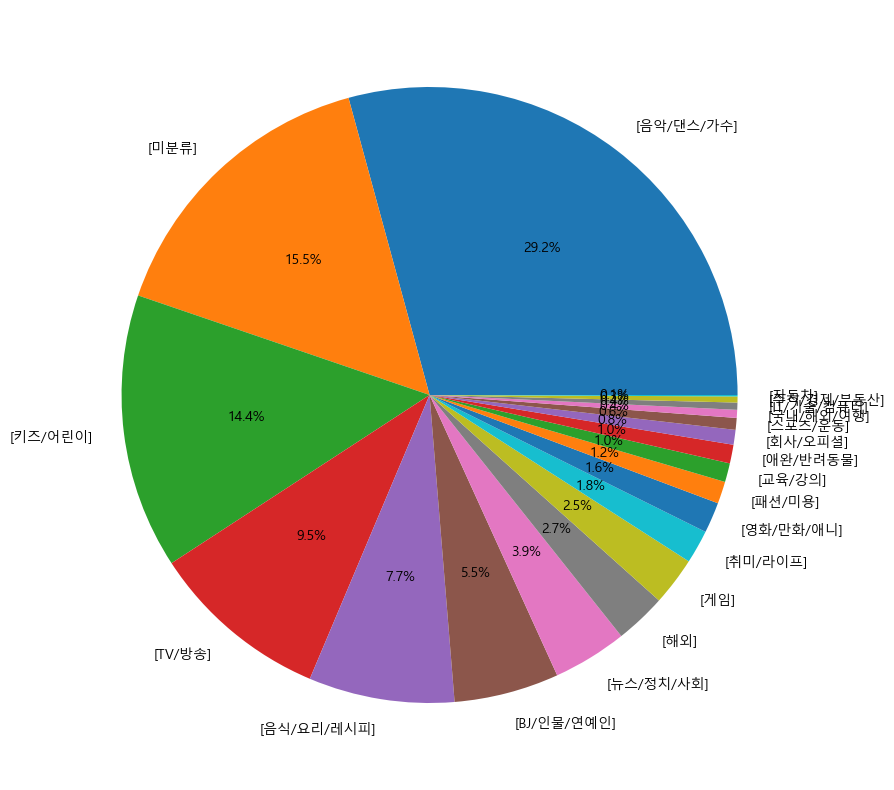

In [118]:
# 카테고리별 구독자 수 시각화하기

plt.figure(figsize = (30,10)) # x,y 사이즈
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

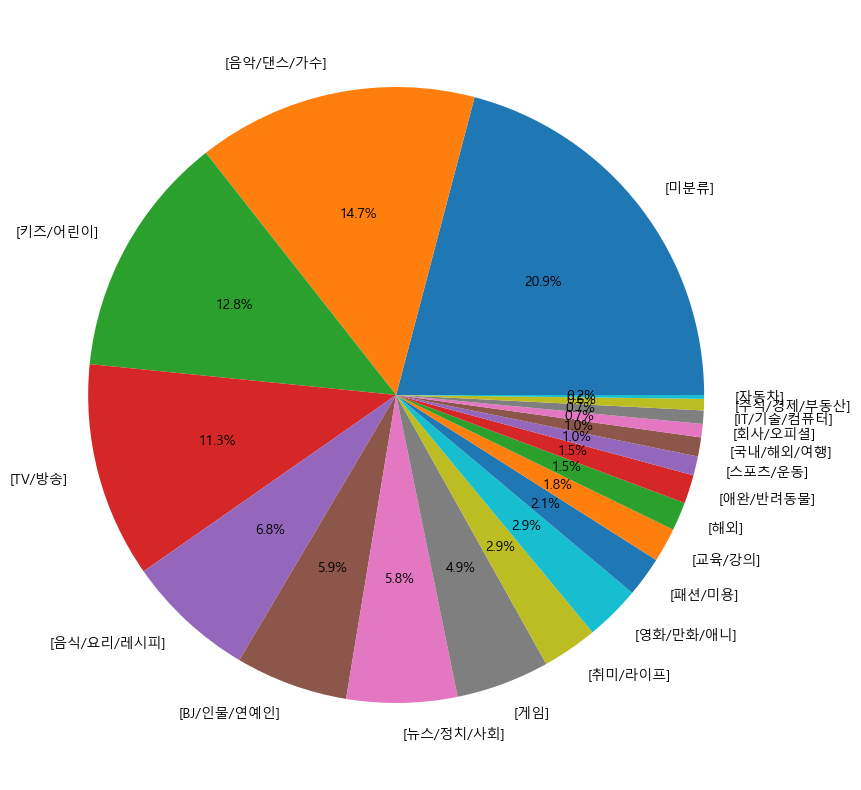

In [119]:
# 카테고리별 채널 수 시각화 하기

pivot_df = pivot_df.sort_values(by = 'category_count', ascending=False)
pivot_df.head()

plt.figure(figsize = (30,10)) # x,y 사이즈
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()